### Pre-processing data for multivariate Ether price prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
# 1-uploading the whole data
df=pd.read_csv('D:\\Ethereum project\\Data Processing\\2-Remove_null.csv', header=0, parse_dates=['Date'], index_col=['Date'])
# Put Ether price as the first column
col_name="EtherPrice"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)
print(df.shape)
df.head()

(1986, 69)


EtherPrice  ADA_Price(USDT)  ADA_Volume(USDT)  ADA_Tradecount  \
Date                                                                        
2016-01-01        0.93              0.0               0.0               0   
2016-01-02        0.93              0.0               0.0               0   
2016-01-03        0.97              0.0               0.0               0   
2016-01-04        0.95              0.0               0.0               0   
2016-01-05        0.95              0.0               0.0               0   

            BNB_Price(USDT)  BNB_Volume(USDT)  BNB_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0               0   
2016-01-02              0.0               0.0               0   
2016-01-03              0.0               0.0               0   
2016-01-04              0.0               0.0               0   
2016-01-05              0.0               0.0               0   

            BTC_Price(USDT)  BTC_Volume(USDT)  BTC_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0               0   
2016-01-02              0.0               0.0               0   
2016-01-03              0.0               0.0               0   
2016-01-04              0.0               0.0               0   
2016-01-05              0.0               0.0               0   

            DOT_Price(USDT)  DOT_Volume(USDT)  DOT_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0               0   
2016-01-02              0.0               0.0               0   
2016-01-03              0.0               0.0               0   
2016-01-04              0.0               0.0               0   
2016-01-05              0.0               0.0               0   

            EOS_Price(USDT)  EOS_Volume(USDT)  EOS_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0               0   
2016-01-02              0.0               0.0               0   
2016-01-03              0.0               0.0               0   
2016-01-04              0.0               0.0               0   
2016-01-05              0.0               0.0               0   

            ETC_Price(USDT)  ETC_Volume(USDT)  ETC_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0               0   
2016-01-02              0.0               0.0               0   
2016-01-03              0.0               0.0               0   
2016-01-04              0.0               0.0               0   
2016-01-05              0.0               0.0               0   

            ETH_Volume(USDT)  ETH_Tradecount  LINK_Price(USDT)  \
Date                                                             
2016-01-01               0.0               0               0.0   
2016-01-02               0.0               0               0.0   
2016-01-03               0.0               0               0.0   
2016-01-04               0.0               0               0.0   
2016-01-05               0.0               0               0.0   

            LINK_Volume(USDT)  LINK_Tradecount  LTC_Price(USDT)  \
Date                                                              
2016-01-01                0.0                0              0.0   
2016-01-02                0.0                0              0.0   
2016-01-03                0.0                0              0.0   
2016-01-04                0.0                0              0.0   
2016-01-05                0.0                0              0.0   

            LTC_Volume(USDT)  LTC_Tradecount  SOL_Price(USDT)  \
Date                                                            
2016-01-01               0.0               0              0.0   
2016-01-02               0.0               0              0.0   

In [5]:
df.describe().to_csv('dfdescribe.csv')

In [6]:
# 2-scaling data using robust scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm['Target']=df['EtherPrice'].values
df_norm.index=df.index
df_norm.head()


EtherPrice  ADA_Price(USDT)  ADA_Volume(USDT)  ADA_Tradecount  \
Date                                                                        
2016-01-01    0.000000              0.0               0.0             0.0   
2016-01-02    0.000000              0.0               0.0             0.0   
2016-01-03    0.000010              0.0               0.0             0.0   
2016-01-04    0.000005              0.0               0.0             0.0   
2016-01-05    0.000005              0.0               0.0             0.0   

            BNB_Price(USDT)  BNB_Volume(USDT)  BNB_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0             0.0   
2016-01-02              0.0               0.0             0.0   
2016-01-03              0.0               0.0             0.0   
2016-01-04              0.0               0.0             0.0   
2016-01-05              0.0               0.0             0.0   

            BTC_Price(USDT)  BTC_Volume(USDT)  BTC_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0             0.0   
2016-01-02              0.0               0.0             0.0   
2016-01-03              0.0               0.0             0.0   
2016-01-04              0.0               0.0             0.0   
2016-01-05              0.0               0.0             0.0   

            DOT_Price(USDT)  DOT_Volume(USDT)  DOT_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0             0.0   
2016-01-02              0.0               0.0             0.0   
2016-01-03              0.0               0.0             0.0   
2016-01-04              0.0               0.0             0.0   
2016-01-05              0.0               0.0             0.0   

            EOS_Price(USDT)  EOS_Volume(USDT)  EOS_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0             0.0   
2016-01-02              0.0               0.0             0.0   
2016-01-03              0.0               0.0             0.0   
2016-01-04              0.0               0.0             0.0   
2016-01-05              0.0               0.0             0.0   

            ETC_Price(USDT)  ETC_Volume(USDT)  ETC_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0             0.0   
2016-01-02              0.0               0.0             0.0   
2016-01-03              0.0               0.0             0.0   
2016-01-04              0.0               0.0             0.0   
2016-01-05              0.0               0.0             0.0   

            ETH_Volume(USDT)  ETH_Tradecount  LINK_Price(USDT)  \
Date                                                             
2016-01-01               0.0             0.0               0.0   
2016-01-02               0.0             0.0               0.0   
2016-01-03               0.0             0.0               0.0   
2016-01-04               0.0             0.0               0.0   
2016-01-05               0.0             0.0               0.0   

            LINK_Volume(USDT)  LINK_Tradecount  LTC_Price(USDT)  \
Date                                                              
2016-01-01                0.0              0.0              0.0   
2016-01-02                0.0              0.0              0.0   
2016-01-03                0.0              0.0              0.0   
2016-01-04                0.0              0.0              0.0   
2016-01-05                0.0              0.0              0.0   

            LTC_Volume(USDT)  LTC_Tradecount  SOL_Price(USDT)  \
Date                                                            
2016-01-01               0.0             0.0              0.0   
2016-01-02               0.0             0.0              0.0   

In [7]:
df_norm.describe()

EtherPrice  ADA_Price(USDT)  ADA_Volume(USDT)  ADA_Tradecount  \
count  1986.000000      1986.000000       1986.000000     1986.000000   
mean      0.090348         0.055188          0.076699        0.027882   
std       0.134381         0.136121          0.122990        0.088018   
min       0.000000         0.000000          0.000000        0.000000   
25%       0.020782         0.000000          0.000000        0.000000   
50%       0.050032         0.017648          0.036304        0.004467   
75%       0.093369         0.039870          0.103465        0.013706   
max       1.000000         1.000000          1.000000        1.000000   

       BNB_Price(USDT)  BNB_Volume(USDT)  BNB_Tradecount  BTC_Price(USDT)  \
count      1986.000000       1986.000000     1986.000000      1986.000000   
mean          0.048737          0.085332        0.035523         0.142661   
std           0.141717          0.097372        0.098228         0.196999   
min           0.000000          0.000000        0.000000         0.000000   
25%           0.000000          0.000000        0.000000         0.000000   
50%           0.016823          0.067938        0.008932         0.106311   
75%           0.030974          0.135460        0.023220         0.155275   
max           1.000000          1.000000        1.000000         1.000000   

       BTC_Volume(USDT)  BTC_Tradecount  DOT_Price(USDT)  DOT_Volume(USDT)  \
count       1986.000000     1986.000000      1986.000000       1986.000000   
mean           0.086003        0.070331         0.056100          0.035625   
std            0.096340        0.106425         0.181783          0.107959   
min            0.000000        0.000000         0.000000          0.000000   
25%            0.000000        0.000000         0.000000          0.000000   
50%            0.071354        0.033237         0.000000          0.000000   
75%            0.129957        0.084622         0.000000          0.000000   
max            1.000000        1.000000         1.000000          1.000000   

       DOT_Tradecount  EOS_Price(USDT)  EOS_Volume(USDT)  EOS_Tradecount  \
count     1986.000000      1986.000000       1986.000000     1986.000000   
mean         0.027308         0.160154          0.035565        0.028975   
std          0.090193         0.179679          0.071758        0.067885   
min          0.000000         0.000000          0.000000        0.000000   
25%          0.000000         0.000000          0.000000        0.000000   
50%          0.000000         0.170985          0.014981        0.012216   
75%          0.000000         0.252877          0.040571        0.028959   
max          1.000000         1.000000          1.000000        1.000000   

       ETC_Price(USDT)  ETC_Volume(USDT)  ETC_Tradecount  ETH_Volume(USDT)  \
count      1986.000000       1986.000000     1986.000000       1986.000000   
mean          0.043515          0.026392        0.008511          0.080360   
std           0.089733          0.057690        0.038280          0.110711   
min           0.000000          0.000000        0.000000          0.000000   
25%           0.000000          0.000000        0.000000          0.000000   
50%           0.033618          0.006940        0.001446          0.040254   
75%           0.052734          0.027841        0.005330          0.123786   
max           1.000000          1.000000        1.000000          1.000000   

       ETH_Tradecount  LINK_Price(USDT)  LINK_Volume(USDT)  LINK_Tradecount  \
count     1986.000000       1986.000000        1986.000000      1986.000000   
mean         0.042262          0.077499           0.072246         0.063837   
std          0.082960          0.167671           0.134462         0.138683   
min          0.000000          0.000000           0.000000         0.000000   
25%          0.000000          0.000000           0.000000         0.000000   
50%          0.020197          0.000000           0.000000         0.000000   
75%         

In [7]:
# 3-split a dataset into train/test sets   
from numpy import split
from numpy import array

train, test = df_norm.loc['2018-01-01':'2021-05-30'],  df_norm.loc['2020-12-28':'2021-05-30']
# restructure into windows of weekly data
train = array(split(train, len(train)/7))
test = array(split(test, len(test)/7))

# convert history into inputs and outputs
n_input=14
n_out=1

# flatten data
data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
X, y = list(), list()
in_start = 0
# step over the entire history one time step at a time
for _ in range(len(data)):
    
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end <= len(data):
        X.append(data[in_start:in_end, :-1])
        y.append(data[in_end:out_end, -1])
    # move along one time step
    in_start += 1
train_x, train_y = array(X), array(y)

# validate train data
print(train_x.shape)
print(train_y.shape)


(1232, 14, 69)
(1232, 1)


In [9]:
# 4-select features using Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
train_x=train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
train_y=train_y.reshape((train_y.shape[0]))
sel = SelectFromModel(RandomForestRegressor( n_estimators = 2000), threshold='0.5*median')
sel.fit(train_x, train_y)
sel.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
a=sel.get_support()

In [11]:
a=a.reshape((14,69))

In [12]:
np.sum(a,1)

array([59, 55, 53, 51, 51, 53, 42, 47, 44, 44, 50, 53, 51, 47])

In [13]:
np.sum(a,0)

array([13,  9,  5,  6, 13, 13, 11, 10,  9,  7, 14,  9,  8,  9,  9,  8, 10,
       11,  9, 11,  8, 12, 14, 13,  9, 10, 13, 14,  9,  9, 12,  5,  8,  8,
        4,  6, 12,  8,  3, 14, 14, 11, 14,  7, 14,  6, 12,  4, 14, 14,  1,
       12, 11, 14, 14, 11, 12, 10, 14,  4, 13, 14, 11, 12,  7, 12,  6, 13,
       14])

In [121]:
#rem2018_20med=df_norm.columns[:-1][np.sum(a,0)<10]
rem2018_20med

Index(['EnsRegistrations'], dtype='object')

In [128]:
rem2018_50med=df_norm.columns[:-1][np.sum(a,0)<10]
rem2018_50med

Index(['ADA_Price(USDT)', 'ADA_Volume(USDT)', 'ADA_Tradecount',
       'BTC_Volume(USDT)', 'DOT_Volume(USDT)', 'DOT_Tradecount',
       'EOS_Price(USDT)', 'EOS_Volume(USDT)', 'EOS_Tradecount',
       'ETC_Tradecount', 'ETH_Tradecount', 'LTC_Price(USDT)', 'SOL_Tradecount',
       'TRX_Volume(USDT)', 'XLM_Price(USDT)', 'XLM_Volume(USDT)',
       'XLM_Tradecount', 'XRP_Volume(USDT)', 'XRP_Tradecount',
       'BlockCountRewards', 'BlockReward', 'BlockTime', 'EnsRegistrations',
       'Uncles', 'Gold_Price', 'OIL_PRICE'],
      dtype='object')

In [85]:
#rem2016_50med=df_norm.columns[:-1][np.sum(a,0)<10]
rem2016_50med

Index(['ADA_Price(USDT)', 'ADA_Volume(USDT)', 'ADA_Tradecount',
       'DOT_Price(USDT)', 'DOT_Volume(USDT)', 'DOT_Tradecount',
       'EOS_Price(USDT)', 'EOS_Volume(USDT)', 'EOS_Tradecount',
       'ETC_Price(USDT)', 'ETC_Volume(USDT)', 'ETC_Tradecount',
       'LINK_Price(USDT)', 'LINK_Volume(USDT)', 'LINK_Tradecount',
       'SOL_Price(USDT)', 'SOL_Volume(USDT)', 'SOL_Tradecount',
       'TRX_Price(USDT)', 'TRX_Volume(USDT)', 'TRX_Tradecount',
       'XLM_Price(USDT)', 'XLM_Volume(USDT)', 'XLM_Tradecount',
       'XRP_Price(USDT)', 'XRP_Volume(USDT)', 'XRP_Tradecount', 'WGS7YR'],
      dtype='object')

In [93]:
#rem2016_100med=df_norm.columns[:-1][np.sum(a,0)<10]
rem2016_100med

Index(['ADA_Price(USDT)', 'ADA_Volume(USDT)', 'ADA_Tradecount',
       'BNB_Price(USDT)', 'DOT_Price(USDT)', 'DOT_Volume(USDT)',
       'DOT_Tradecount', 'EOS_Price(USDT)', 'EOS_Volume(USDT)',
       'EOS_Tradecount', 'ETC_Price(USDT)', 'ETC_Volume(USDT)',
       'ETC_Tradecount', 'ETH_Volume(USDT)', 'ETH_Tradecount',
       'LINK_Price(USDT)', 'LINK_Volume(USDT)', 'LINK_Tradecount',
       'LTC_Volume(USDT)', 'SOL_Price(USDT)', 'SOL_Volume(USDT)',
       'SOL_Tradecount', 'TRX_Price(USDT)', 'TRX_Volume(USDT)',
       'TRX_Tradecount', 'XLM_Price(USDT)', 'XLM_Volume(USDT)',
       'XLM_Tradecount', 'XRP_Price(USDT)', 'XRP_Volume(USDT)',
       'XRP_Tradecount', 'BTC-Dominance',
       'tokenerc-20txns-ERC20 daily token transfer', 'WGS7YR', 'Gold_Price',
       'OIL_PRICE'],
      dtype='object')

In [8]:
# 5- calculate variance_inflation_factor (VIF) for independant variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_norm.loc['2018-01-01':'2021-05-30'])
VIF=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
VIF

c:\users\98912\.virtualenvs\98912-eapzcx7p\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\98912\.virtualenvs\98912-eapzcx7p\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                              0.000000
EtherPrice                              inf
ADA_Price(USDT)                   81.835783
ADA_Volume(USDT)                  10.396691
ADA_Tradecount                    23.244767
BNB_Price(USDT)                  164.950272
BNB_Volume(USDT)                   4.860492
BNB_Tradecount                    18.017297
BTC_Price(USDT)                  243.769631
BTC_Volume(USDT)                  13.736555
BTC_Tradecount                    69.254858
DOT_Price(USDT)                  136.221261
DOT_Volume(USDT)                  17.306528
DOT_Tradecount                    41.607011
EOS_Price(USDT)                    8.663206
EOS_Volume(USDT)                  36.305048
EOS_Tradecount                    38.301442
ETC_Price(USDT)                   34.009747
ETC_Volume(USDT)                  11.122905
ETC_Tradecount                    15.371491
ETH_Volume(USDT)                  20.432937
ETH_Tradecount                    57.841950
LINK_Price(USDT)                

<ipython-input-9-93a84c08cca8>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax=plt.subplots(figsize=(14,3))


<Figure size 1000x12000 with 0 Axes>

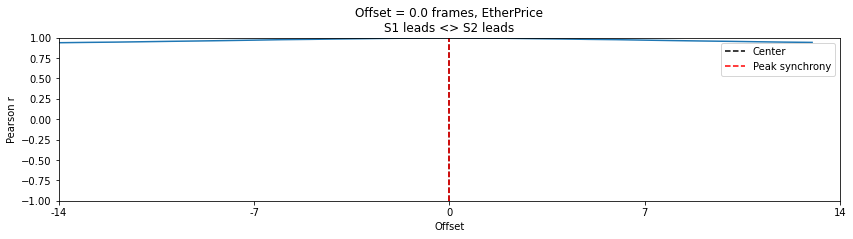

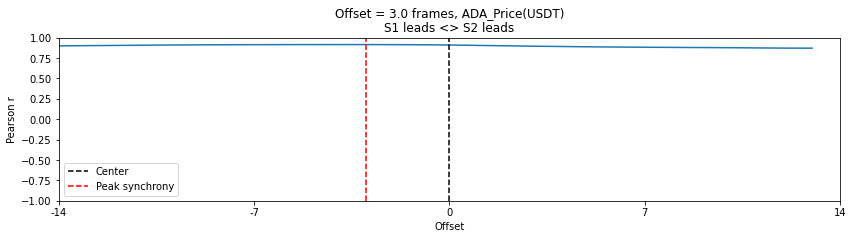

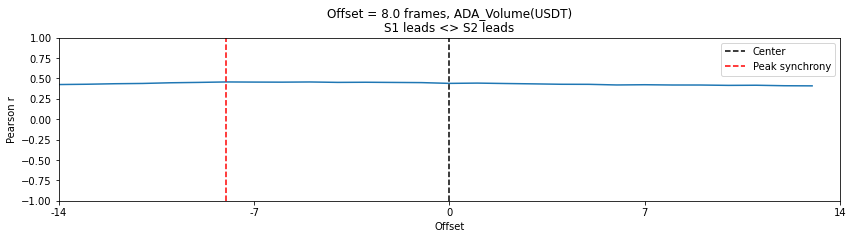

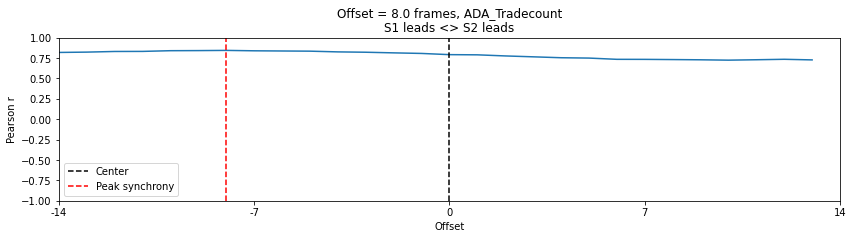

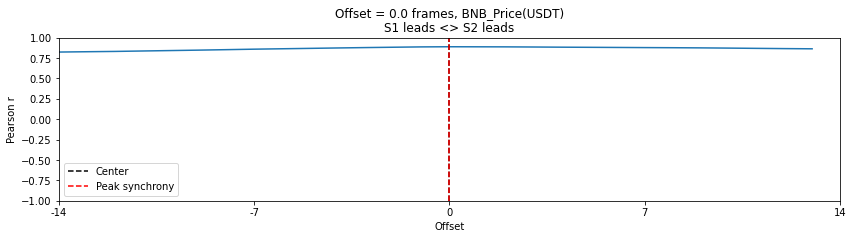

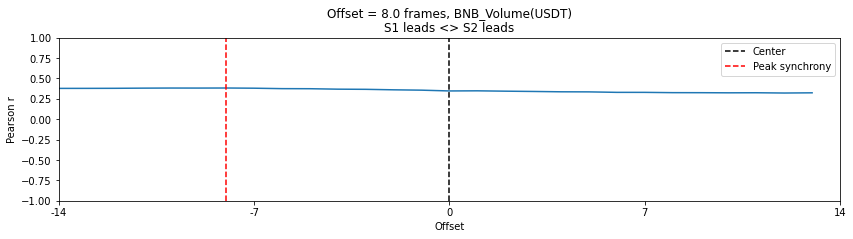

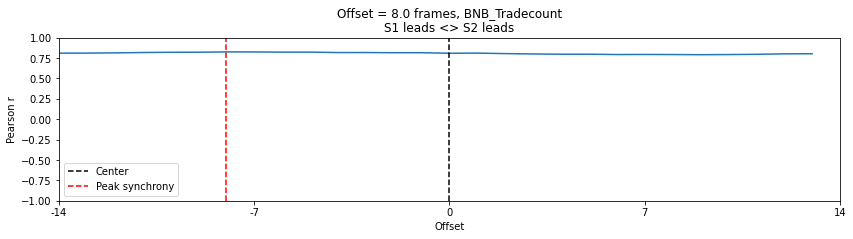

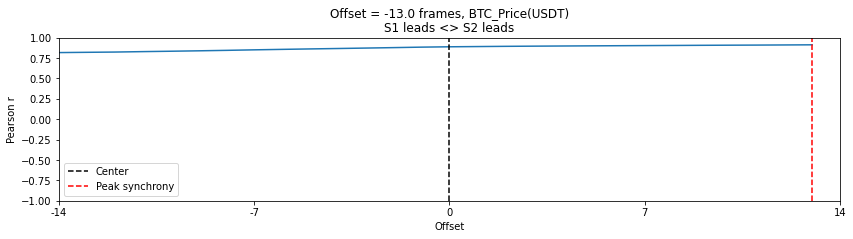

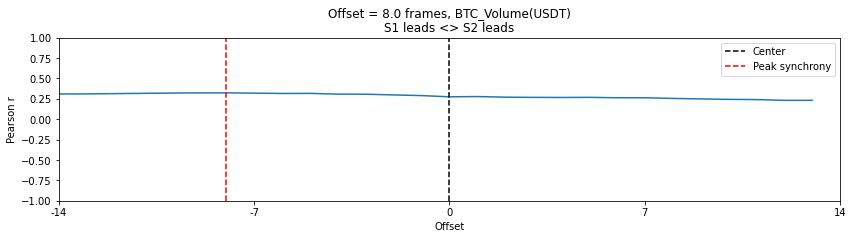

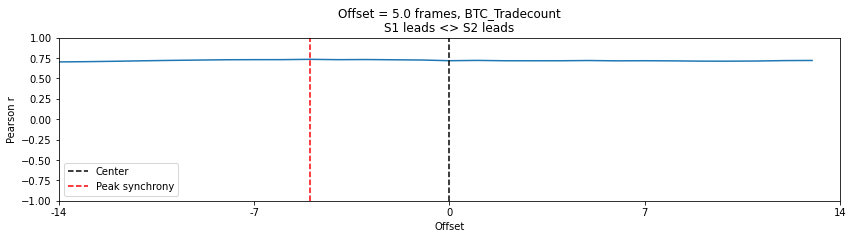

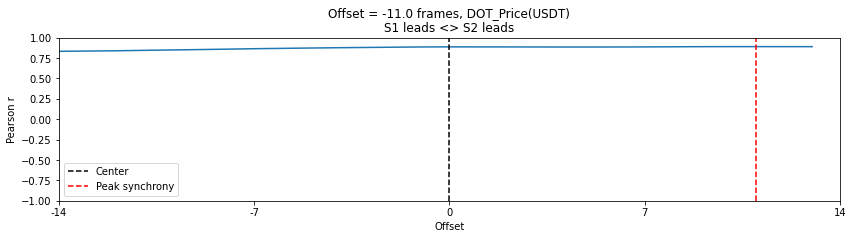

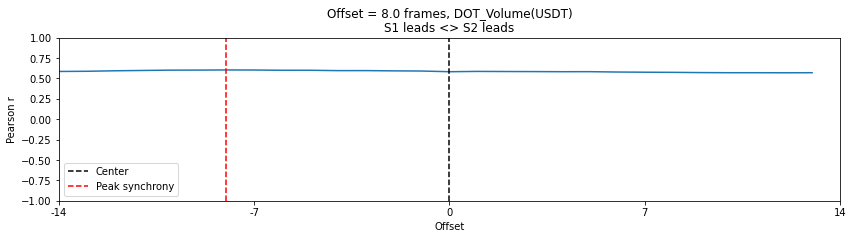

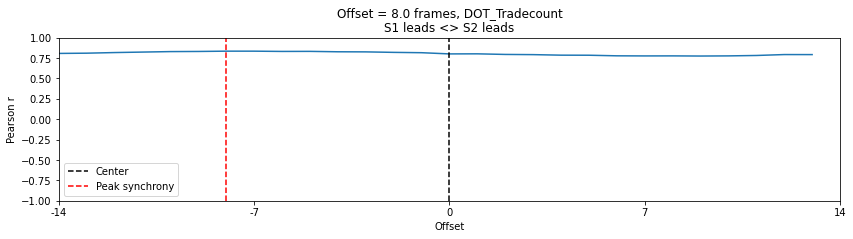

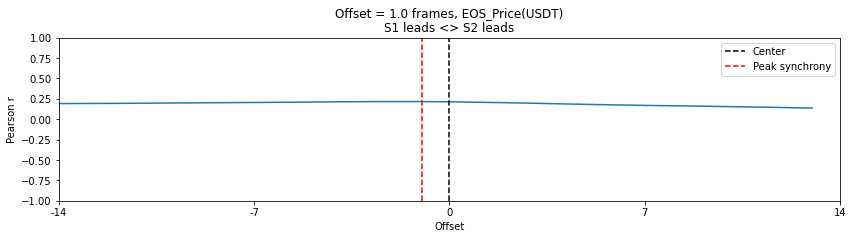

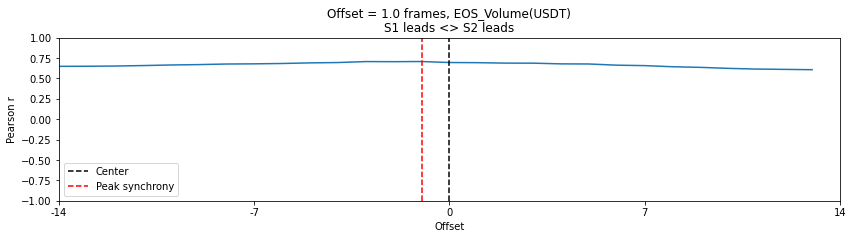

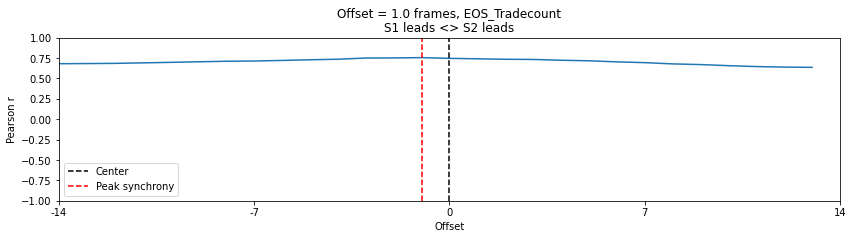

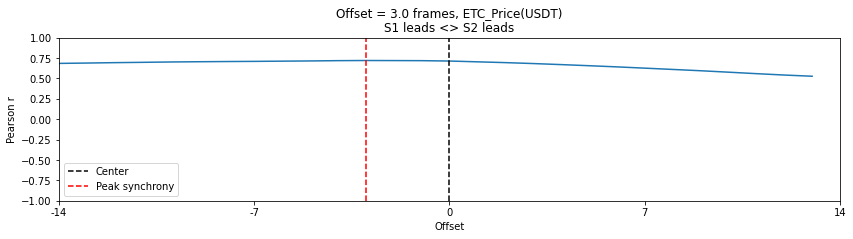

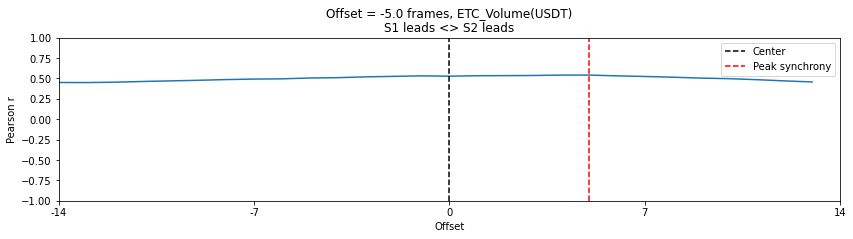

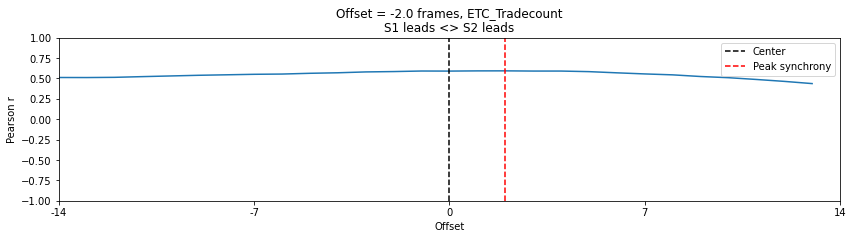

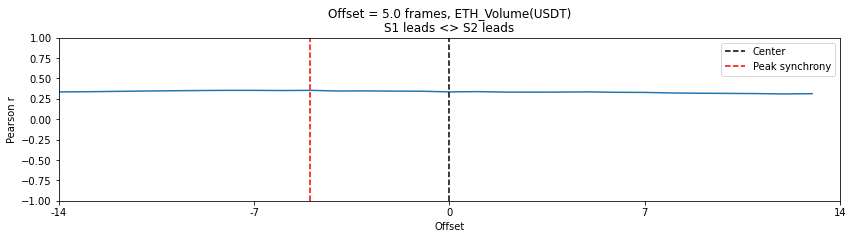

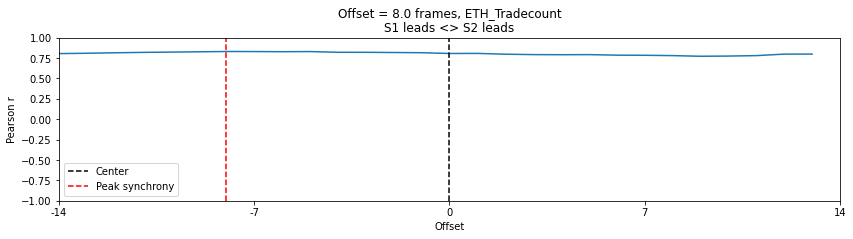

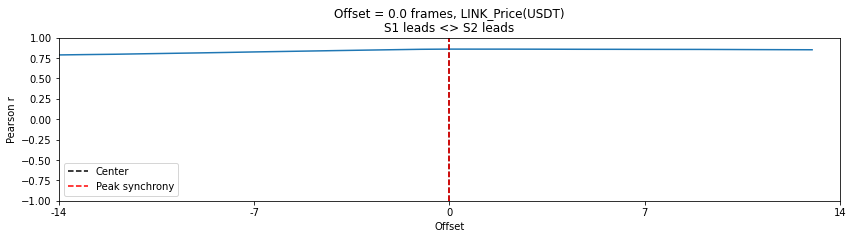

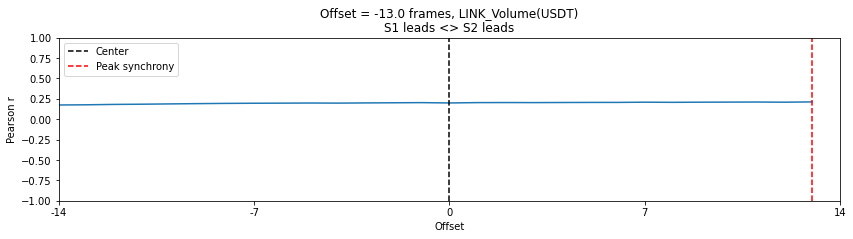

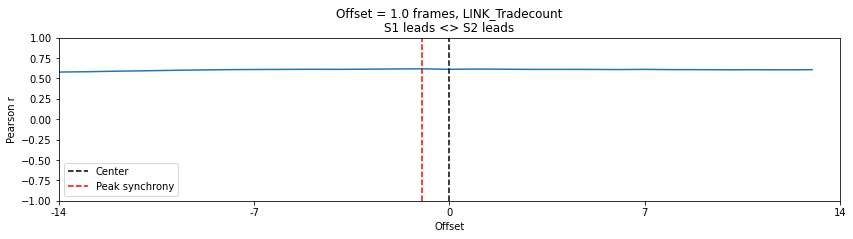

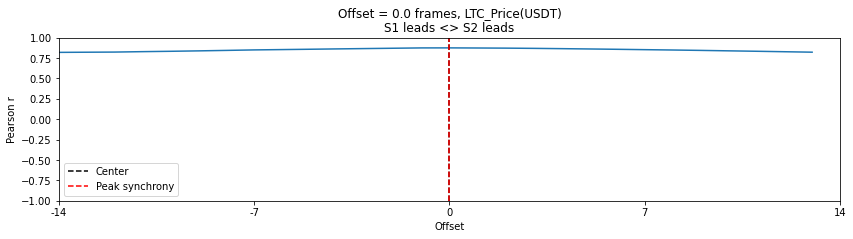

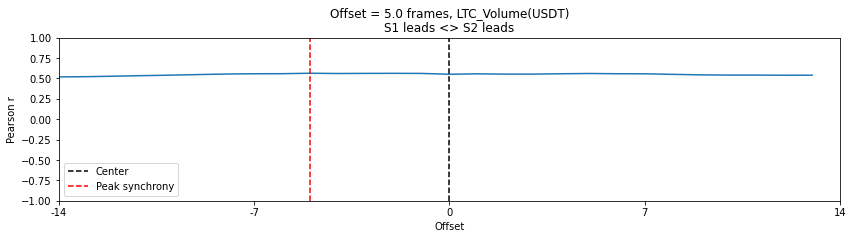

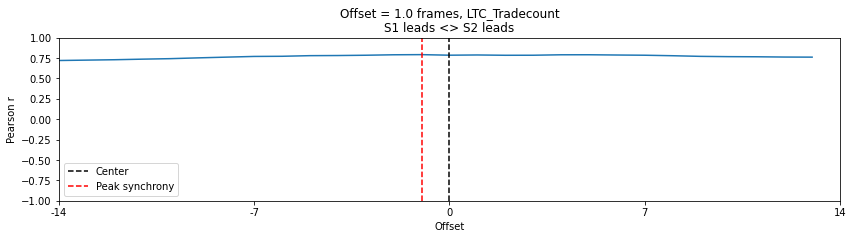

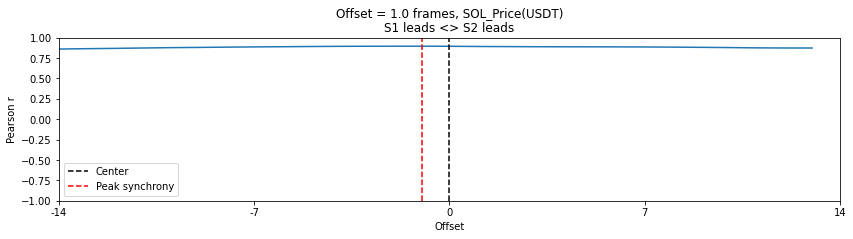

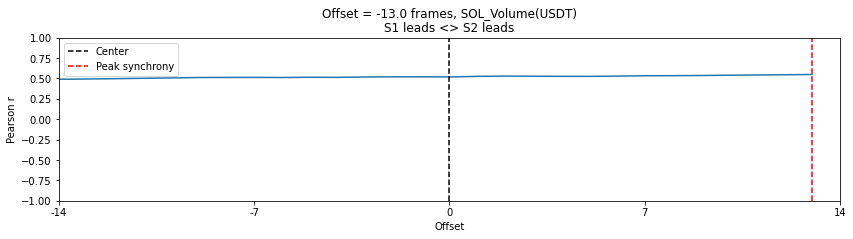

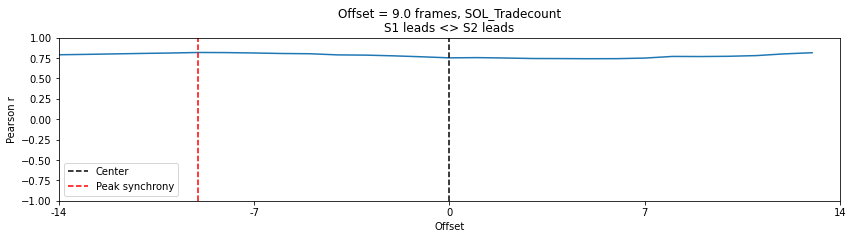

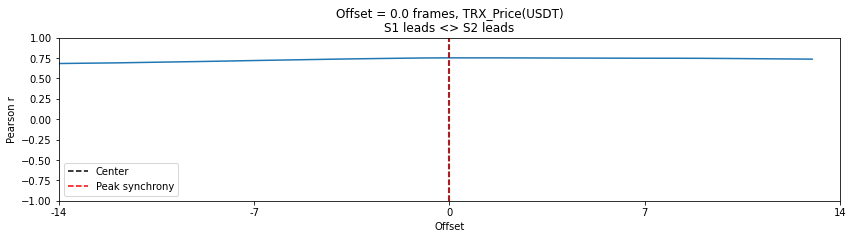

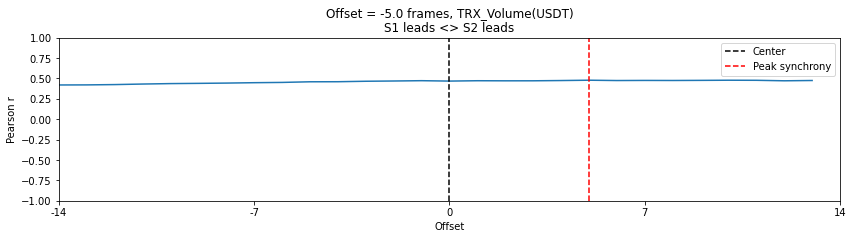

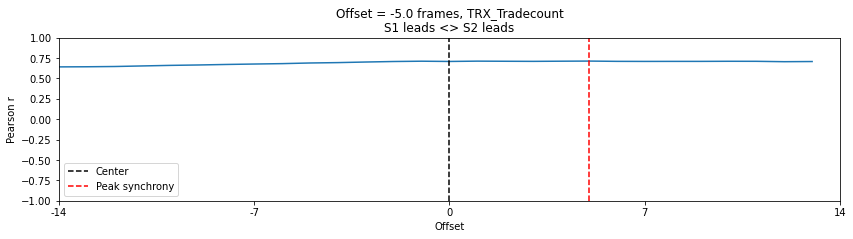

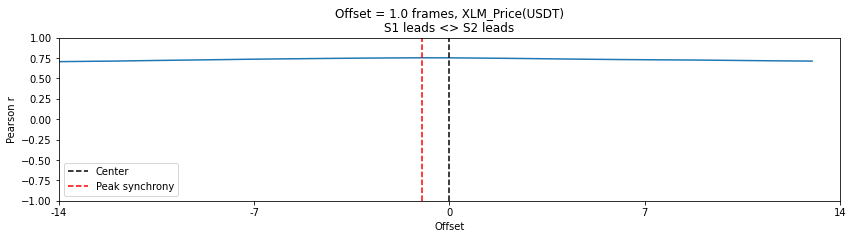

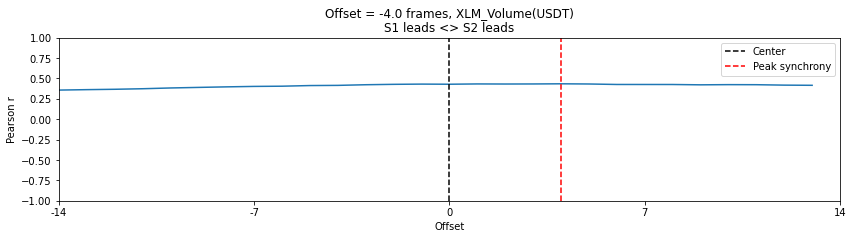

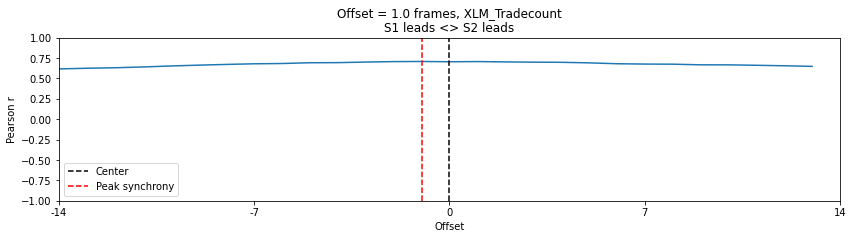

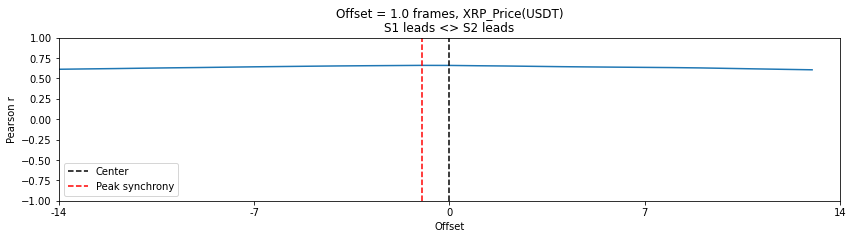

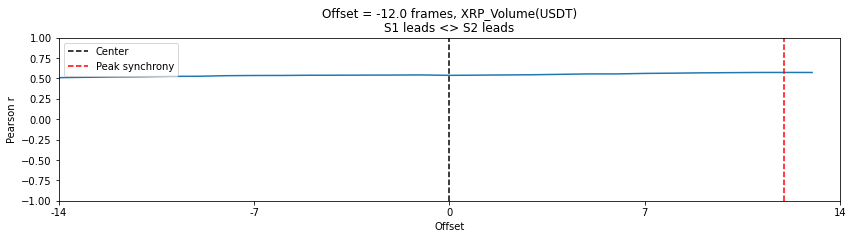

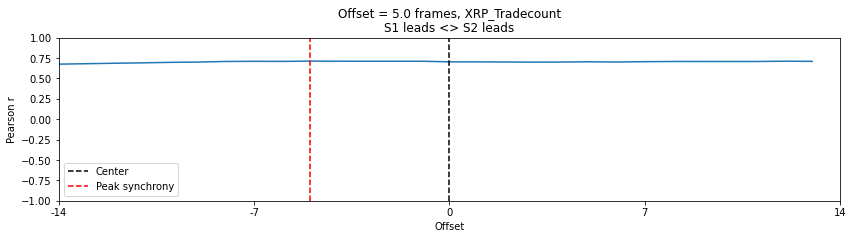

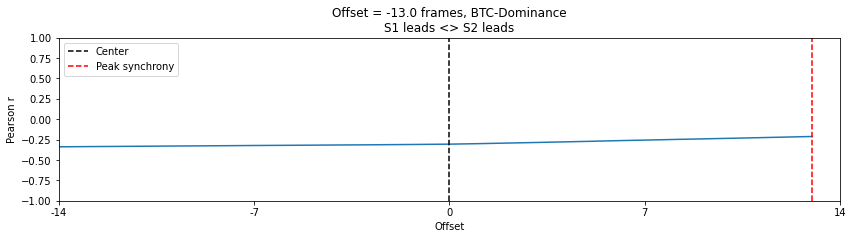

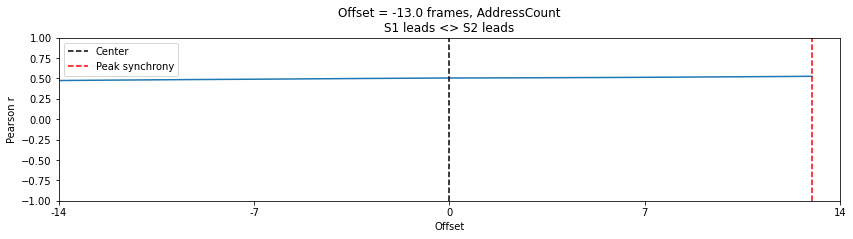

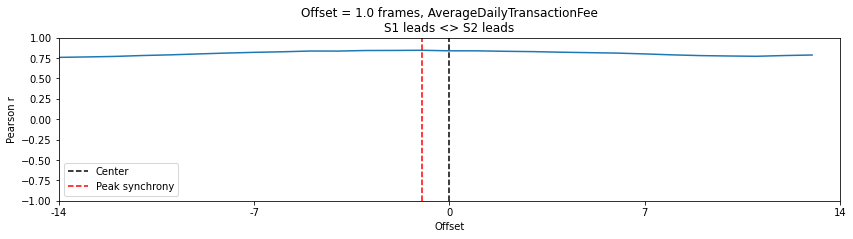

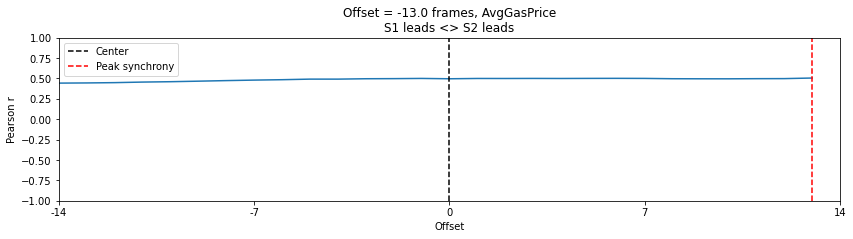

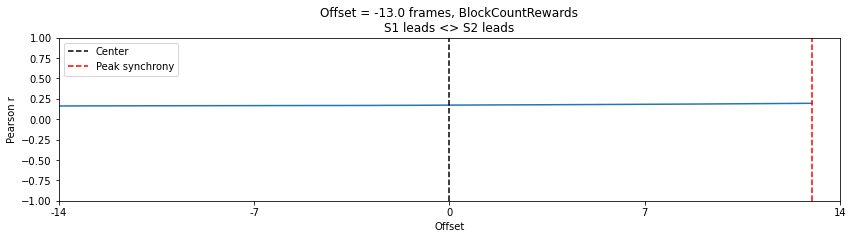

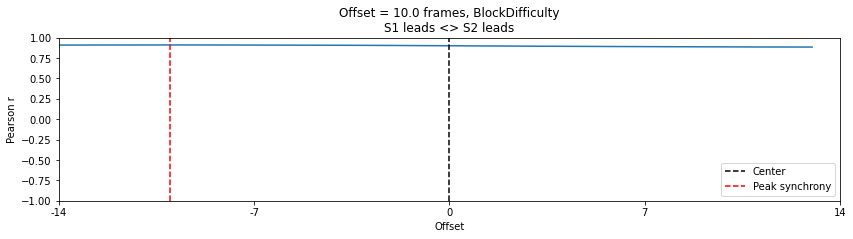

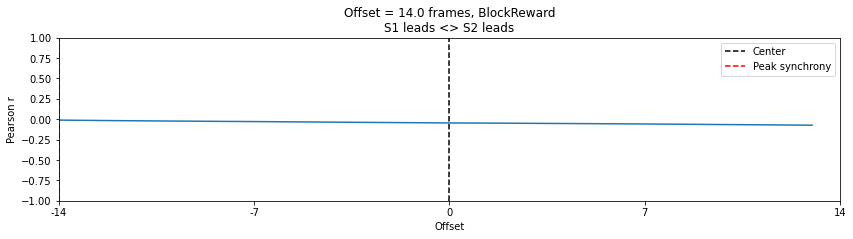

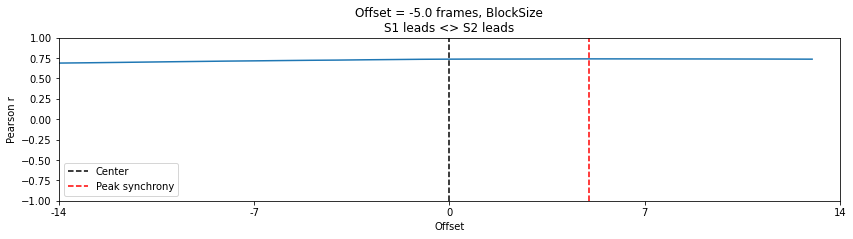

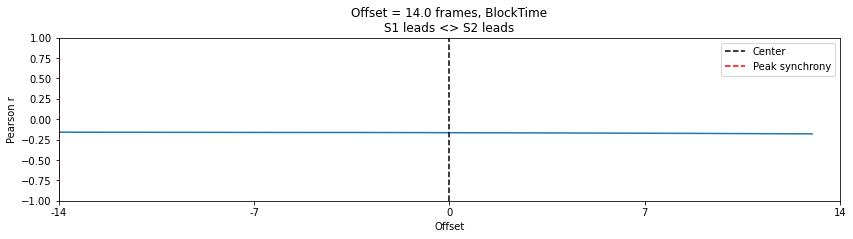

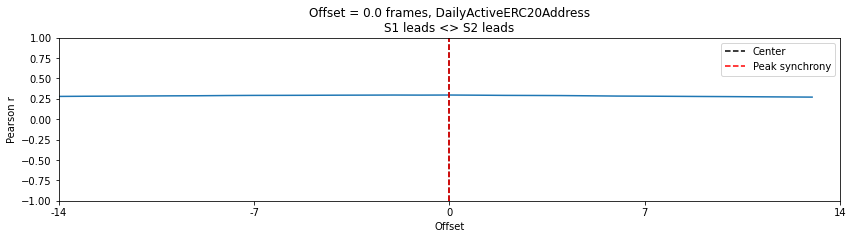

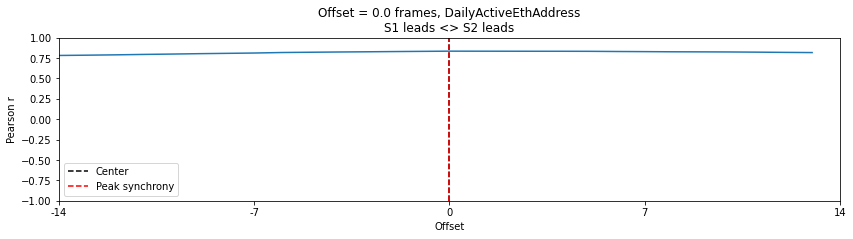

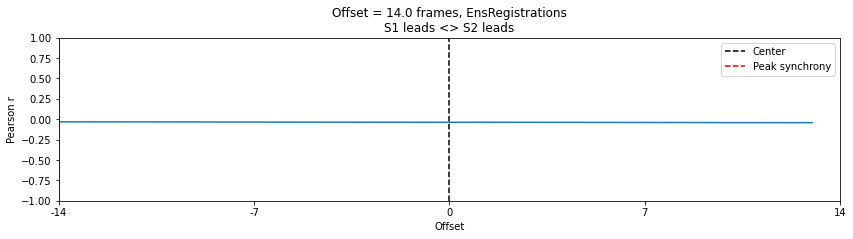

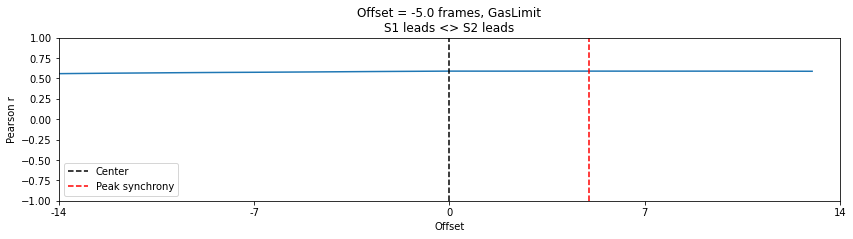

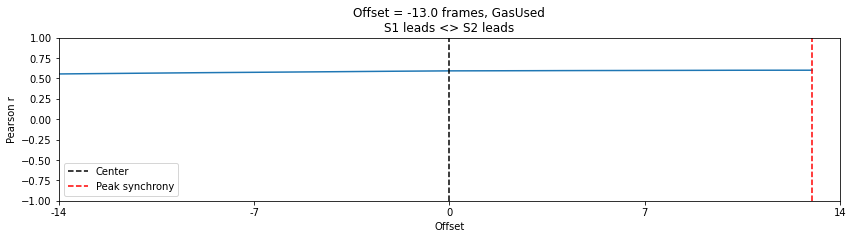

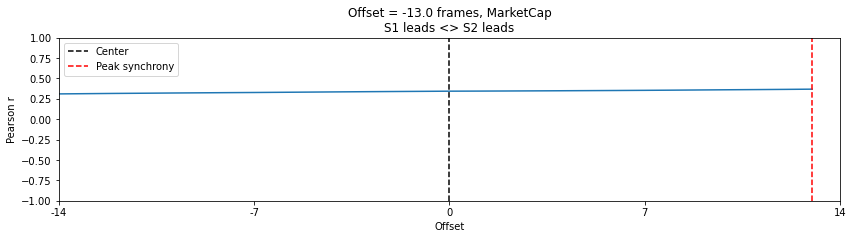

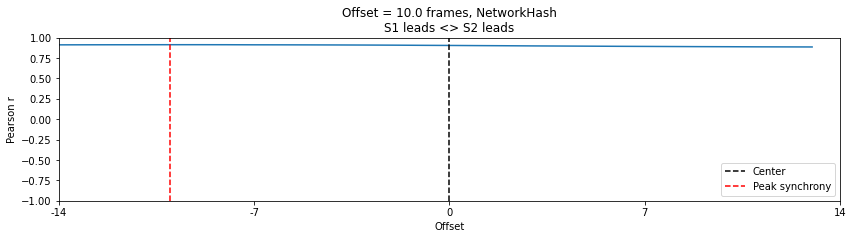

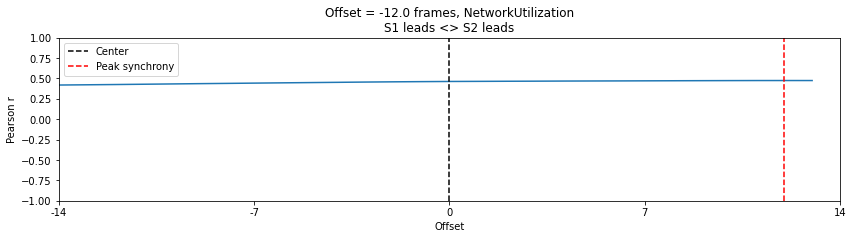

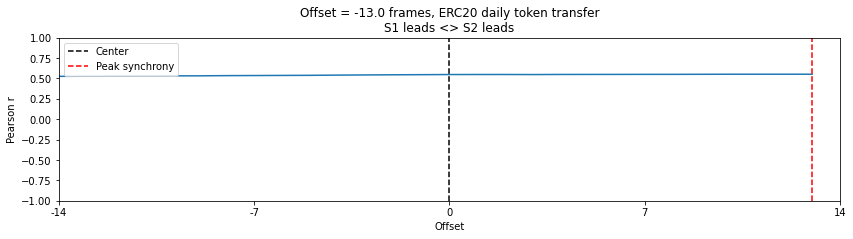

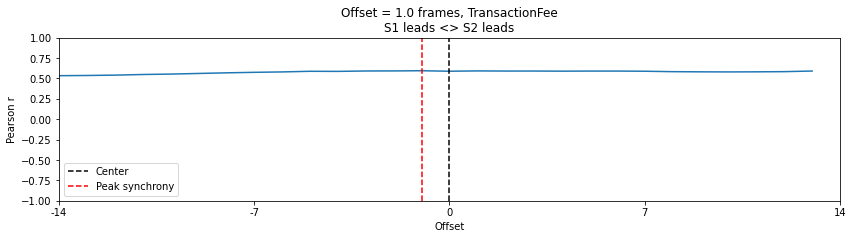

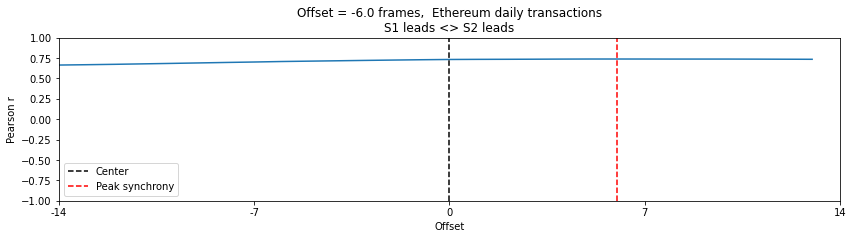

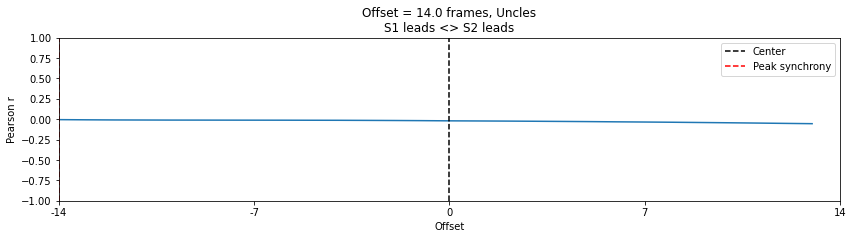

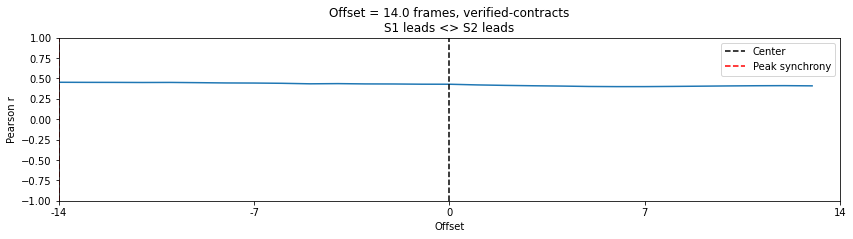

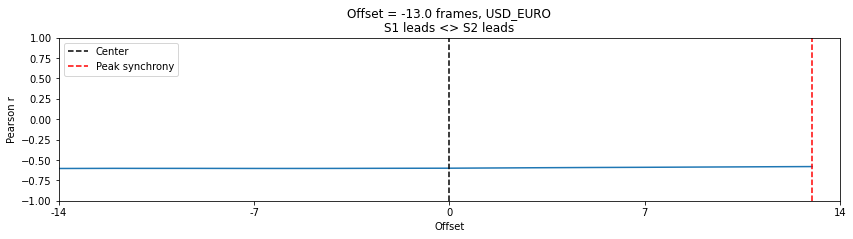

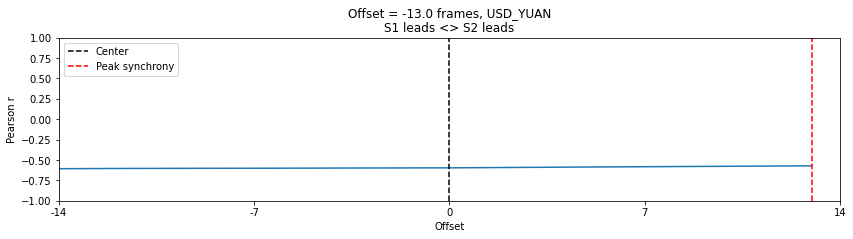

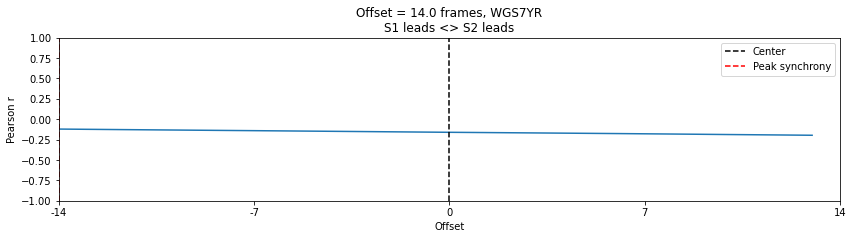

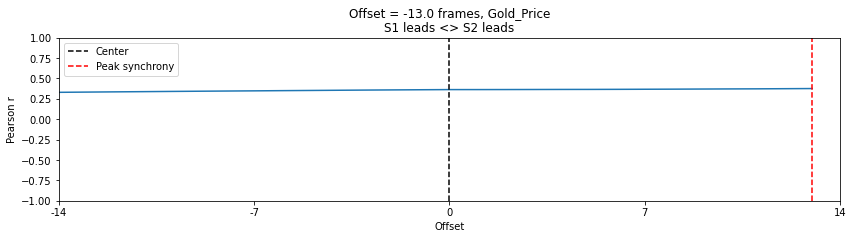

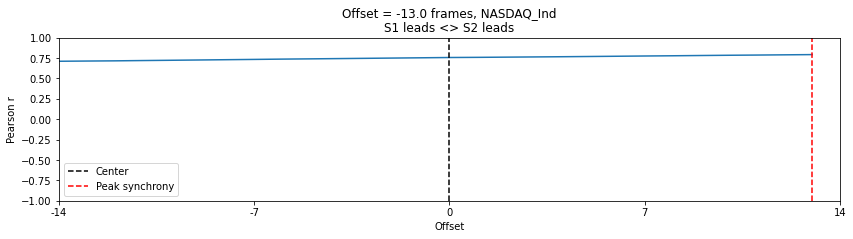

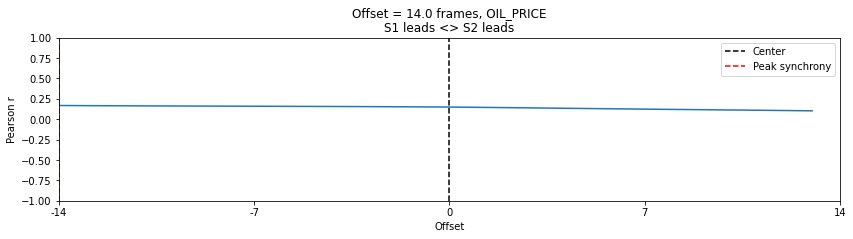

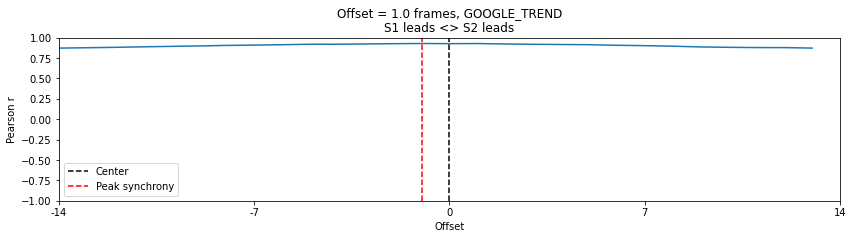

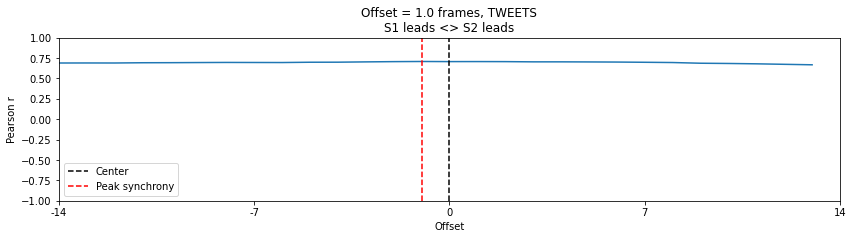

Selected=  ['EtherPrice', 'ADA_Price(USDT)', 'ADA_Tradecount', 'BNB_Price(USDT)', 'BNB_Tradecount', 'BTC_Price(USDT)', 'BTC_Tradecount', 'DOT_Price(USDT)', 'DOT_Volume(USDT)', 'DOT_Tradecount', 'EOS_Volume(USDT)', 'EOS_Tradecount', 'ETC_Price(USDT)', 'ETC_Volume(USDT)', 'ETC_Tradecount', 'ETH_Tradecount', 'LINK_Price(USDT)', 'LINK_Tradecount', 'LTC_Price(USDT)', 'LTC_Volume(USDT)', 'LTC_Tradecount', 'SOL_Price(USDT)', 'SOL_Volume(USDT)', 'SOL_Tradecount', 'TRX_Price(USDT)', 'TRX_Tradecount', 'XLM_Price(USDT)', 'XLM_Tradecount', 'XRP_Price(USDT)', 'XRP_Volume(USDT)', 'XRP_Tradecount', 'AddressCount', 'AverageDailyTransactionFee', 'AvgGasPrice', 'BlockDifficulty', 'BlockSize', 'DailyActiveEthAddress', 'GasLimit', 'GasUsed', 'NetworkHash', 'ERC20 daily token transfer', 'TransactionFee', ' Ethereum daily transactions', 'USD_EURO', 'USD_YUAN', 'NASDAQ_Ind', 'GOOGLE_TREND', 'TWEETS']
Number of Selected=  48
Removed=  ['ADA_Volume(USDT)', 'BNB_Volume(USDT)', 'BTC_Volume(USDT)', 'EOS_Price(USD

In [9]:
# 6- calculate CrossCorrelation matrix
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))
d=df_norm.loc['2018-01-01':'2021-05-30']
d1 = d.iloc[:,-1]
lagint=14
selected=list()
removed=list()
CorrMatrix=list()
plt.figure(figsize=(10,120), dpi= 100)
for i in range(0,len(d.columns)-1):
    # create subplot
    f,ax=plt.subplots(figsize=(14,3))
    # get variable name
    name = d.columns[i]
    d2 = d.iloc[:,i]    
    rs = [crosscorr(d1,d2, lag) for lag in range(-lagint,lagint)]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} frames, {name}\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[0,28], xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([0, 7, 14, 21, 28])
    ax.set_xticklabels([ -14, -7,  0, 7, 14 ]);
    plt.legend()
    CorrMatrix.append(rs)
    if np.max(np.abs(rs))>=0.50:
        selected.append(name)
    else:
        removed.append(name)
    
plt.show()
print('Selected= ', selected)
print('Number of Selected= ', len(selected))
print('Removed= ' , removed)
print('Number of Removed= ', len(removed))

In [10]:
CorrMatrix

[[0.9385642872187301,
  0.9426825425212074,
  0.9460011282261618,
  0.9506550213491076,
  0.9558181319384117,
  0.9600932959175702,
  0.9649928710694001,
  0.9703705661728038,
  0.9761595425887594,
  0.9798153856158708,
  0.9845699744930946,
  0.9885848264439294,
  0.9929570056422662,
  0.9957106651245775,
  1.0,
  0.9957106651245774,
  0.9929570056422662,
  0.9885848264439294,
  0.9845699744930947,
  0.9798153856158708,
  0.9761595425887591,
  0.9703705661728041,
  0.9649928710694001,
  0.9600932959175701,
  0.9558181319384116,
  0.9506550213491075,
  0.946001128226162,
  0.9426825425212073],
 [0.8996550687241892,
  0.9029341202604306,
  0.905435234729854,
  0.90799763069111,
  0.9106758452187629,
  0.9123637374014342,
  0.9137393267678134,
  0.914629383004557,
  0.9153640682626076,
  0.9155981706508178,
  0.9158823015921492,
  0.9159428437928169,
  0.915027784400454,
  0.9136743948142257,
  0.9109097186356099,
  0.9058341893088878,
  0.9009117705550195,
  0.8962008899431627,
  0.8923

In [11]:
maxcor=[(np.max(np.abs(i))) for i in CorrMatrix]
maxcor

[1.0,
 0.9159428437928169,
 0.45757811044423613,
 0.8445051368683579,
 0.8892694683447856,
 0.38329195448111447,
 0.8261447758738278,
 0.9130509622113845,
 0.3236886418644498,
 0.7349300691928128,
 0.8908391401983587,
 0.6047412605765171,
 0.835147845574067,
 0.21692830959831358,
 0.7081223539956675,
 0.7560402812708139,
 0.7205039289939887,
 0.5419417454017291,
 0.5936759691317137,
 0.3545521712909042,
 0.8310580749308831,
 0.8602940602630197,
 0.21276232112089877,
 0.6188559730363594,
 0.875358954797392,
 0.564408414928919,
 0.7926016836172373,
 0.8961981840848913,
 0.5489908743143926,
 0.8189887301191308,
 0.7532182377722758,
 0.4789266298989553,
 0.7135890658710263,
 0.753873532657088,
 0.4348924809798379,
 0.7086921512680975,
 0.6608601981624277,
 0.5740933636771539,
 0.7130940721910454,
 0.3379128450461001,
 0.5270349318222012,
 0.8459337598670146,
 0.5056835587291509,
 0.19572366947482467,
 0.9113611217167822,
 0.07299008819669656,
 0.7406409716824862,
 0.1793389852695349,
 0.29

In [18]:
# 7-Granger Causality Investigation
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

#read data source
df=pd.read_csv('D:\\Ethereum project\\Data Processing\\2-Remove_null.csv', header=0, parse_dates=['Date'], index_col=['Date'])
# start analysis ftom 2018
df=df.loc['2018-01-01':,:]

# put EtherPrice as first column
col_name="EtherPrice"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)

#scaling variables
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
data.index=df.index

variables=data.columns 
maxlag=20
matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
for col in matrix.columns:
    for row in matrix.index:
        test_result = grangercausalitytests(data[[row, col]], maxlag=maxlag, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in variables]
matrix.index = [var + '_y' for var in variables]
print(matrix)
print(matrix.iloc[0,:])

c:\users\98912\.virtualenvs\98912-eapzcx7p\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\98912\.virtualenvs\98912-eapzcx7p\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\users\98912\.virtualenvs\98912-eapzcx7p\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\users\98912\.virtualenvs\98912-eapzcx7p\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but ra

                                EtherPrice_x  ADA_Price(USDT)_x  \
EtherPrice_y                          1.0000             0.0000   
ADA_Price(USDT)_y                     0.0000             1.0000   
ADA_Volume(USDT)_y                    0.0000             0.0000   
ADA_Tradecount_y                      0.0000             0.0000   
BNB_Price(USDT)_y                     0.0000             0.0000   
BNB_Volume(USDT)_y                    0.0000             0.0000   
BNB_Tradecount_y                      0.0000             0.0000   
BTC_Price(USDT)_y                     0.0000             0.0000   
BTC_Volume(USDT)_y                    0.0000             0.0000   
BTC_Tradecount_y                      0.0000             0.0000   
DOT_Price(USDT)_y                     0.0000             0.0000   
DOT_Volume(USDT)_y                    0.0000             0.0000   
DOT_Tradecount_y                      0.0000             0.0000   
EOS_Price(USDT)_y                     0.0000             0.000

In [133]:
rem2018_Granger=df_norm.columns[:-1][matrix.iloc[0,:]>=0.05]
rem2018_Granger

Index(['EtherPrice', 'LINK_Volume(USDT)', 'BlockCountRewards', 'BlockReward',
       'BlockTime', 'DailyActiveERC20Address', 'EnsRegistrations',
       'NetworkUtilization', 'Uncles', 'USD_EURO', 'USD_YUAN', 'WGS7YR',
       'OIL_PRICE'],
      dtype='object')

In [12]:
feature=pd.DataFrame( [matrix.iloc[0,:].values, VIF[1:-1].values, np.sum(a,0), 
                       [maxcor[i][0] for i in range(69)], [maxcor[i][1] for i in range(69)]], columns=df_norm.columns[:-1],
                    index=['Granger', 'VIF', 'RandForImp', 'MaxCrosCorvalue', 'MaxCrosCorlag'])
feature

NameError: name 'matrix' is not defined

In [19]:
feature2=pd.DataFrame( [matrix.iloc[0,:].values, VIF[1:-1].values, np.sum(a,0), 
                       [maxcor[i][0] for i in range(69)], [maxcor[i][1] for i in range(69)]], columns=df_norm.columns[:-1],
                    index=['Granger', 'VIF', 'RandForImp', 'MaxCrosCorvalue', 'MaxCrosCorlag'])
feature2

EtherPrice  ADA_Price(USDT)  ADA_Volume(USDT)  \
Granger                 1.0         0.000000          0.000000   
VIF                     inf        81.835783         10.396691   
RandForImp             13.0         9.000000          5.000000   
MaxCrosCorvalue         1.0         0.915943          0.457578   
MaxCrosCorlag           0.0        -3.000000         -8.000000   

                 ADA_Tradecount  BNB_Price(USDT)  BNB_Volume(USDT)  \
Granger                0.000000         0.000000          0.001400   
VIF                   23.244767       164.950272          4.860492   
RandForImp             6.000000        13.000000         13.000000   
MaxCrosCorvalue        0.844505         0.889269          0.383292   
MaxCrosCorlag         -8.000000         0.000000         -8.000000   

                 BNB_Tradecount  BTC_Price(USDT)  BTC_Volume(USDT)  \
Granger                0.000000         0.000000          0.000600   
VIF                   18.017297       243.769631         13.736555   
RandForImp            11.000000        10.000000          9.000000   
MaxCrosCorvalue        0.826145         0.913051          0.323689   
MaxCrosCorlag         -8.000000        13.000000         -8.000000   

                 BTC_Tradecount  DOT_Price(USDT)  DOT_Volume(USDT)  \
Granger                0.000000         0.000000          0.000000   
VIF                   69.254858       136.221261         17.306528   
RandForImp             7.000000        14.000000          9.000000   
MaxCrosCorvalue        0.734930         0.890839          0.604741   
MaxCrosCorlag         -5.000000        11.000000         -8.000000   

                 DOT_Tradecount  EOS_Price(USDT)  EOS_Volume(USDT)  \
Granger                0.000000         0.010400          0.000000   
VIF                   41.607011         8.663206         36.305048   
RandForImp             8.000000         9.000000          9.000000   
MaxCrosCorvalue        0.835148         0.216928          0.708122   
MaxCrosCorlag         -8.000000        -1.000000         -1.000000   

                 EOS_Tradecount  ETC_Price(USDT)  ETC_Volume(USDT)  \
Granger                0.000000         0.000000          0.000000   
VIF                   38.301442        34.009747         11.122905   
RandForImp             8.000000        10.000000         11.000000   
MaxCrosCorvalue        0.756040         0.720504          0.541942   
MaxCrosCorlag         -1.000000        -3.000000          5.000000   

                 ETC_Tradecount  ETH_Volume(USDT)  ETH_Tradecount  \
Granger                0.000000          0.000200        0.000000   
VIF                   15.371491         20.432937       57.841950   
RandForImp             9.000000         11.000000        8.000000   
MaxCrosCorvalue        0.593676          0.354552        0.831058   
MaxCrosCorlag          2.000000         -5.000000       -8.000000   

                 LINK_Price(USDT)  LINK_Volume(USDT)  LINK_Tradecount  \
Granger                  0.000000           0.064400         0.000000   
VIF                    114.802406          12.311182        30.937388   
RandForImp              12.000000          14.000000        13.000000   
MaxCrosCorvalue          0.860294           0.212762         0.618856   
MaxCrosCorlag            0.000000          13.000000        -1.000000   

                 LTC_Price(USDT)  LTC_Volume(USDT)  LTC_Tradecount  \
Granger                 0.000000          0.000000        0.000000   
VIF                    40.736015         19.145051       26.213950   
RandForImp              9.000000         10.000000       13.000000   
MaxCrosCorvalue         0.875359          0.564408        0.792602   
MaxCrosCorlag           0.000000         -5.000000       -1.000000   

                 SOL_Price(USDT)  SOL_Volume(USDT)  SOL_Tradecount  \
Granger                 0.000000          0.000000        0.000000   
VIF                   131.155245          7.843669       18.533624   
RandForImp             14.0000

In [192]:
feature.to_csv('Feature.csv')

In [4]:
feature=pd.read_csv('D:\\Ethereum project\\Data Processing\\3-Feature.csv', header=0)
feature.head()

Unnamed: 0  EtherPrice  ADA_Price(USDT)  ADA_Volume(USDT)  \
0          Granger         1.0         0.000000          0.000000   
1              VIF         inf        81.835783         10.396691   
2       RandForImp        12.0         8.000000          4.000000   
3  MaxCrosCorvalue         1.0         0.915943          0.457578   
4    MaxCrosCorlag         0.0        -3.000000         -8.000000   

   ADA_Tradecount  BNB_Price(USDT)  BNB_Volume(USDT)  BNB_Tradecount  \
0        0.000000         0.000000          0.001400        0.000000   
1       23.244767       164.950272          4.860492       18.017297   
2        6.000000        14.000000         14.000000       11.000000   
3        0.844505         0.889269          0.383292        0.826145   
4       -8.000000         0.000000         -8.000000       -8.000000   

   BTC_Price(USDT)  BTC_Volume(USDT)  BTC_Tradecount  DOT_Price(USDT)  \
0         0.000000          0.000600        0.000000         0.000000   
1       243.769631         13.736555       69.254858       136.221261   
2        12.000000          6.000000       10.000000        14.000000   
3         0.913051          0.323689        0.734930         0.890839   
4        13.000000         -8.000000       -5.000000        11.000000   

   DOT_Volume(USDT)  DOT_Tradecount  EOS_Price(USDT)  EOS_Volume(USDT)  \
0          0.000000        0.000000         0.010400          0.000000   
1         17.306528       41.607011         8.663206         36.305048   
2          6.000000        7.000000         8.000000          7.000000   
3          0.604741        0.835148         0.216928          0.708122   
4         -8.000000       -8.000000        -1.000000         -1.000000   

   EOS_Tradecount  ETC_Price(USDT)  ETC_Volume(USDT)  ETC_Tradecount  \
0        0.000000         0.000000          0.000000        0.000000   
1       38.301442        34.009747         11.122905       15.371491   
2        7.000000        12.000000         10.000000        9.000000   
3        0.756040         0.720504          0.541942        0.593676   
4       -1.000000        -3.000000          5.000000        2.000000   

   ETH_Volume(USDT)  ETH_Tradecount  LINK_Price(USDT)  LINK_Volume(USDT)  \
0          0.000200        0.000000          0.000000           0.064400   
1         20.432937       57.841950        114.802406          12.311182   
2         10.000000        9.000000         13.000000          13.000000   
3          0.354552        0.831058          0.860294           0.212762   
4         -5.000000       -8.000000          0.000000          13.000000   

   LINK_Tradecount  LTC_Price(USDT)  LTC_Volume(USDT)  LTC_Tradecount  \
0         0.000000         0.000000          0.000000        0.000000   
1        30.937388        40.736015         19.145051       26.213950   
2        10.000000         9.000000         12.000000       13.000000   
3         0.618856         0.875359          0.564408        0.792602   
4        -1.000000         0.000000         -5.000000       -1.000000   

   SOL_Price(USDT)  SOL_Volume(USDT)  SOL_Tradecount  TRX_Price(USDT)  \
0         0.000000          0.000000        0.000000         0.000000   
1       131.155245          7.843669       18.533624        40.660021   
2        13.000000         10.000000        9.000000        13.000000   
3         0.896198          0.548991        0.818989         0.753218   
4        -1.000000         13.000000       -9.000000         0.000000   

   TRX_Volume(USDT)  TRX_Tradecount  XLM_Price(USDT)  XLM_Volume(USDT)  \
0          0.000000        0.000000         0.000000          0.000000   
1         10.782215       20.559535        51.696021         17.595147   
2          7.000000       10.000000         8.000000          5.000000   
3          0.478927        0.713589         0.753874          0.434892   
4          5.000000        5.000000        -1.000000          4.000000   

   XLM_Tradecount  XRP_Price(USDT)  XRP_Volume(USDT)  XRP_Trade

In [5]:
feature.index = feature.iloc[:,0].values
feature = feature.iloc[: , 1:]


feature.head()

EtherPrice  ADA_Price(USDT)  ADA_Volume(USDT)  \
Granger                 1.0         0.000000          0.000000   
VIF                     inf        81.835783         10.396691   
RandForImp             12.0         8.000000          4.000000   
MaxCrosCorvalue         1.0         0.915943          0.457578   
MaxCrosCorlag           0.0        -3.000000         -8.000000   

                 ADA_Tradecount  BNB_Price(USDT)  BNB_Volume(USDT)  \
Granger                0.000000         0.000000          0.001400   
VIF                   23.244767       164.950272          4.860492   
RandForImp             6.000000        14.000000         14.000000   
MaxCrosCorvalue        0.844505         0.889269          0.383292   
MaxCrosCorlag         -8.000000         0.000000         -8.000000   

                 BNB_Tradecount  BTC_Price(USDT)  BTC_Volume(USDT)  \
Granger                0.000000         0.000000          0.000600   
VIF                   18.017297       243.769631         13.736555   
RandForImp            11.000000        12.000000          6.000000   
MaxCrosCorvalue        0.826145         0.913051          0.323689   
MaxCrosCorlag         -8.000000        13.000000         -8.000000   

                 BTC_Tradecount  DOT_Price(USDT)  DOT_Volume(USDT)  \
Granger                0.000000         0.000000          0.000000   
VIF                   69.254858       136.221261         17.306528   
RandForImp            10.000000        14.000000          6.000000   
MaxCrosCorvalue        0.734930         0.890839          0.604741   
MaxCrosCorlag         -5.000000        11.000000         -8.000000   

                 DOT_Tradecount  EOS_Price(USDT)  EOS_Volume(USDT)  \
Granger                0.000000         0.010400          0.000000   
VIF                   41.607011         8.663206         36.305048   
RandForImp             7.000000         8.000000          7.000000   
MaxCrosCorvalue        0.835148         0.216928          0.708122   
MaxCrosCorlag         -8.000000        -1.000000         -1.000000   

                 EOS_Tradecount  ETC_Price(USDT)  ETC_Volume(USDT)  \
Granger                0.000000         0.000000          0.000000   
VIF                   38.301442        34.009747         11.122905   
RandForImp             7.000000        12.000000         10.000000   
MaxCrosCorvalue        0.756040         0.720504          0.541942   
MaxCrosCorlag         -1.000000        -3.000000          5.000000   

                 ETC_Tradecount  ETH_Volume(USDT)  ETH_Tradecount  \
Granger                0.000000          0.000200        0.000000   
VIF                   15.371491         20.432937       57.841950   
RandForImp             9.000000         10.000000        9.000000   
MaxCrosCorvalue        0.593676          0.354552        0.831058   
MaxCrosCorlag          2.000000         -5.000000       -8.000000   

                 LINK_Price(USDT)  LINK_Volume(USDT)  LINK_Tradecount  \
Granger                  0.000000           0.064400         0.000000   
VIF                    114.802406          12.311182        30.937388   
RandForImp              13.000000          13.000000        10.000000   
MaxCrosCorvalue          0.860294           0.212762         0.618856   
MaxCrosCorlag            0.000000          13.000000        -1.000000   

                 LTC_Price(USDT)  LTC_Volume(USDT)  LTC_Tradecount  \
Granger                 0.000000          0.000000        0.000000   
VIF                    40.736015         19.145051       26.213950   
RandForImp              9.000000         12.000000       13.000000   
MaxCrosCorvalue         0.875359          0.564408        0.792602   
MaxCrosCorlag           0.000000         -5.000000       -1.000000   

                 SOL_Price(USDT)  SOL_Volume(USDT)  SOL_Tradecount  \
Granger                 0.000000          0.000000        0.000000   
VIF                   131.155245          7.843669       18.533624   
RandForImp             13.0000

In [6]:
# Granger criteria to remove >=0.05
gran=feature.columns[feature.loc['Granger',:].values>=0.05]

# VIF criteria to remove highest 15 values
sortfea=feature.sort_values('VIF',1)
vifrem=sortfea.columns[-15:-1]

# Randomforrest Importance criteria to remove 
rf=feature.columns[feature.loc['RandForImp',:].values<7]

# CrossCorr Importance criteria to remove 
ccor=feature.columns[abs(feature.loc['MaxCrosCorvalue',:].values)<0.4]

In [7]:
from collections import Counter
totalrem=list(gran)+ list(vifrem)+ list(rf)+ list(ccor)
C=Counter(totalrem)
C

Counter({'EtherPrice': 1,
         'LINK_Volume(USDT)': 2,
         'BlockCountRewards': 4,
         'BlockReward': 2,
         'BlockTime': 3,
         'DailyActiveERC20Address': 2,
         'EnsRegistrations': 3,
         'NetworkUtilization': 2,
         'Uncles': 4,
         'USD_EURO': 1,
         'USD_YUAN': 1,
         'WGS7YR': 2,
         'OIL_PRICE': 3,
         'SOL_Price(USDT)': 1,
         'DOT_Price(USDT)': 1,
         'BNB_Price(USDT)': 1,
         'BTC_Price(USDT)': 1,
         'GasLimit': 1,
         'GasUsed': 1,
         'MarketCap': 2,
         'AddressCount': 1,
         'BlockDifficulty': 1,
         'NetworkHash': 1,
         'ADA_Volume(USDT)': 1,
         'ADA_Tradecount': 1,
         'BTC_Volume(USDT)': 2,
         'DOT_Volume(USDT)': 1,
         'XLM_Volume(USDT)': 1,
         'XLM_Tradecount': 1,
         'XRP_Volume(USDT)': 1,
         'XRP_Tradecount': 1,
         'BNB_Volume(USDT)': 1,
         'EOS_Price(USDT)': 1,
         'ETH_Volume(USDT)': 1,
       

In [9]:
from numpy import array
Four=array(list(C.keys()))[array(list(C.values()))==4]
Four

array(['BlockCountRewards', 'Uncles'], dtype='<U23')

In [10]:
Three=array(list(C.keys()))[array(list(C.values()))==3]
Three

array(['BlockTime', 'EnsRegistrations', 'OIL_PRICE'], dtype='<U23')

In [11]:
Two=array(list(C.keys()))[array(list(C.values()))==2]
Two

array(['LINK_Volume(USDT)', 'BlockReward', 'DailyActiveERC20Address',
       'NetworkUtilization', 'WGS7YR', 'MarketCap', 'BTC_Volume(USDT)'],
      dtype='<U23')

In [12]:
One=array(list(C.keys()))[array(list(C.values()))==1]
One

array(['EtherPrice', 'USD_EURO', 'USD_YUAN', 'SOL_Price(USDT)',
       'DOT_Price(USDT)', 'BNB_Price(USDT)', 'BTC_Price(USDT)',
       'GasLimit', 'GasUsed', 'AddressCount', 'BlockDifficulty',
       'NetworkHash', 'ADA_Volume(USDT)', 'ADA_Tradecount',
       'DOT_Volume(USDT)', 'XLM_Volume(USDT)', 'XLM_Tradecount',
       'XRP_Volume(USDT)', 'XRP_Tradecount', 'BNB_Volume(USDT)',
       'EOS_Price(USDT)', 'ETH_Volume(USDT)', 'BTC-Dominance',
       'Gold_Price'], dtype='<U23')

In [13]:
set(gran).intersection(set(One))

{'EtherPrice', 'USD_EURO', 'USD_YUAN'}

In [14]:
set(vifrem).intersection(set(One))

{'AddressCount',
 'BNB_Price(USDT)',
 'BTC_Price(USDT)',
 'BlockDifficulty',
 'DOT_Price(USDT)',
 'GasLimit',
 'GasUsed',
 'NetworkHash',
 'SOL_Price(USDT)'}

In [15]:
set(rf).intersection(set(One))

{'ADA_Tradecount',
 'ADA_Volume(USDT)',
 'DOT_Volume(USDT)',
 'XLM_Tradecount',
 'XLM_Volume(USDT)',
 'XRP_Tradecount',
 'XRP_Volume(USDT)'}

In [16]:
set(ccor).intersection(set(One))

{'BNB_Volume(USDT)',
 'BTC-Dominance',
 'EOS_Price(USDT)',
 'ETH_Volume(USDT)',
 'Gold_Price'}

In [17]:
zr=['DOT_Price(USDT)', 'DOT_Tradecount','SOL_Price(USDT)', 'SOL_Volume(USDT)', 'SOL_Tradecount','LINK_Price(USDT)',  'LINK_Tradecount']

In [18]:
Final_Remove= zr + list(Four) + list(Three) + list(Two) + list(set(rf).intersection(set(One)))
len(Final_Remove)


26

In [407]:
# remove features
for i in Final_Remove:
    df_norm.drop(i, inplace=True, axis=1)

In [408]:
df_norm

EtherPrice  ADA_Price(USDT)  BNB_Price(USDT)  BNB_Volume(USDT)  \
Date                                                                         
2018-01-01    0.164080         0.000000         0.006106          0.027982   
2018-01-02    0.189895         0.000000         0.006235          0.058250   
2018-01-03    0.209207         0.000000         0.006892          0.042564   
2018-01-04    0.210117         0.000000         0.007222          0.043415   
2018-01-05    0.215560         0.000000         0.011517          0.133005   
2018-01-06    0.225146         0.000000         0.021885          0.151193   
2018-01-07    0.252320         0.000000         0.024736          0.072239   
2018-01-08    0.256801         0.000000         0.021149          0.100517   
2018-01-09    0.294173         0.000000         0.020305          0.060571   
2018-01-10    0.284350         0.000000         0.019889          0.053773   
2018-01-11    0.257584         0.000000         0.022818          0.171687   
2018-01-12    0.287288         0.000000         0.026360          0.139840   
2018-01-13    0.317549         0.000000         0.027070          0.049185   
2018-01-14    0.311316         0.000000         0.025726          0.064293   
2018-01-15    0.291599         0.000000         0.023659          0.109299   
2018-01-16    0.235848         0.000000         0.018148          0.489700   
2018-01-17    0.229608         0.000000         0.013981          0.491604   
2018-01-18    0.226747         0.000000         0.014777          0.328771   
2018-01-19    0.232700         0.000000         0.015336          0.144902   
2018-01-20    0.260313         0.000000         0.016976          0.125649   
2018-01-21    0.235563         0.000000         0.016343          0.160541   
2018-01-22    0.223494         0.000000         0.013841          0.138390   
2018-01-23    0.219792         0.000000         0.013050          0.111651   
2018-01-24    0.238660         0.000000         0.013768          0.092313   
2018-01-25    0.234899         0.000000         0.013800          0.066461   
2018-01-26    0.235438         0.000000         0.013287          0.084434   
2018-01-27    0.250204         0.000000         0.013475          0.044827   
2018-01-28    0.280101         0.000000         0.013940          0.063961   
2018-01-29    0.265062         0.000000         0.013491          0.038114   
2018-01-30    0.239141         0.000000         0.011732          0.061231   
2018-01-31    0.250748         0.000000         0.010553          0.042550   
2018-02-01    0.229974         0.000000         0.009054          0.103351   
2018-02-02    0.203440         0.000000         0.007849          0.195621   
2018-02-03    0.216472         0.000000         0.008012          0.112303   
2018-02-04    0.181504         0.000000         0.006955          0.095721   
2018-02-05    0.149164         0.000000         0.004669          0.151059   
2018-02-06    0.171112         0.000000         0.004556          0.301883   
2018-02-07    0.163009         0.000000         0.005580          0.214825   
2018-02-08    0.178077         0.000000         0.005628          0.000000   
2018-02-09    0.193777         0.000000         0.006985          0.115175   
2018-02-10    0.187156         0.000000         0.007728          0.162073   
2018-02-11    0.177513         0.000000         0.006819          0.145781   
2018-02-12    0.190700         0.000000         0.006887          0.090585   
2018-02-13    0.184772         0.000000         0.007151          0.063386   
2018-02-14    0.204084         0.000000         0.007963          0.123213   
2018-02-15    0.205997         0.000000         0.009397          0.206203   
2018-02-16    0.208455         0.000000         0.010056          0.093398   
2018-02-17    0.217424         0.000000         0.010624          0.108799   
2018-02-18    0.202568         0.000000         0.010224          0.104092   
2018-02-19    0.208887         0.0

In [409]:
df_norm.shape

(1248, 44)

In [410]:
df_norm.to_csv('normal-44.csv')

In [21]:
# remove features
for i in Final_Remove:
    df.drop(i, inplace=True, axis=1)

In [22]:
df.shape

(1986, 43)

In [23]:
df.head()

EtherPrice  ADA_Price(USDT)  BNB_Price(USDT)  BNB_Volume(USDT)  \
Date                                                                         
2016-01-01        0.93              0.0              0.0               0.0   
2016-01-02        0.93              0.0              0.0               0.0   
2016-01-03        0.97              0.0              0.0               0.0   
2016-01-04        0.95              0.0              0.0               0.0   
2016-01-05        0.95              0.0              0.0               0.0   

            BNB_Tradecount  BTC_Price(USDT)  BTC_Tradecount  EOS_Price(USDT)  \
Date                                                                           
2016-01-01               0              0.0               0              0.0   
2016-01-02               0              0.0               0              0.0   
2016-01-03               0              0.0               0              0.0   
2016-01-04               0              0.0               0              0.0   
2016-01-05               0              0.0               0              0.0   

            EOS_Volume(USDT)  EOS_Tradecount  ETC_Price(USDT)  \
Date                                                            
2016-01-01               0.0               0              0.0   
2016-01-02               0.0               0              0.0   
2016-01-03               0.0               0              0.0   
2016-01-04               0.0               0              0.0   
2016-01-05               0.0               0              0.0   

            ETC_Volume(USDT)  ETC_Tradecount  ETH_Volume(USDT)  \
Date                                                             
2016-01-01               0.0               0               0.0   
2016-01-02               0.0               0               0.0   
2016-01-03               0.0               0               0.0   
2016-01-04               0.0               0               0.0   
2016-01-05               0.0               0               0.0   

            ETH_Tradecount  LTC_Price(USDT)  LTC_Volume(USDT)  LTC_Tradecount  \
Date                                                                            
2016-01-01               0              0.0               0.0               0   
2016-01-02               0              0.0               0.0               0   
2016-01-03               0              0.0               0.0               0   
2016-01-04               0              0.0               0.0               0   
2016-01-05               0              0.0               0.0               0   

            TRX_Price(USDT)  TRX_Volume(USDT)  TRX_Tradecount  \
Date                                                            
2016-01-01              0.0               0.0               0   
2016-01-02              0.0               0.0               0   
2016-01-03              0.0               0.0               0   
2016-01-04              0.0               0.0               0   
2016-01-05              0.0               0.0               0   

            XLM_Price(USDT)  XRP_Price(USDT)  BTC-Dominance  AddressCount  \
Date                                                                        
2016-01-01              0.0              0.0          91.26         40701   
2016-01-02              0.0              0.0          91.26         40850   
2016-01-03              0.0              0.0          91.26         41000   
2016-01-04              0.0              0.0          91.26         41198   
2016-01-05              0.0              0.0          91.48         41381   

            AverageDailyTransactionFee   AvgGasPrice  BlockDifficulty  \
Date                                                                    
2016-01-01                         0.0  5.474757e+10            8.547   
2016-01-02                         0.0  5.332345e+10            8.147   
2016-01-03                         0.0  5.334234e+10            8.312   
2016-01-04                         0.0  5.403807e+10    

In [24]:
df.to_csv('original2016-43.csv')